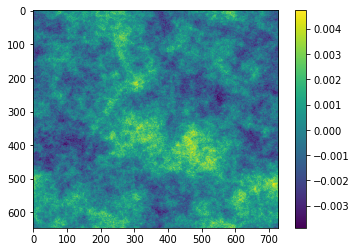

In [25]:
## Python translation of fracsurfatmo.m from Ramon Hanssen


import os
import numpy as np
import matplotlib.pyplot as plt
from pysar.utils import readfile, writefile

# default setting
length, width = 646, 729
beta = np.array([5./3., 8./3., 2./3.], np.float32)
regime = np.array([60., 90., 100.], np.float32)
p0 = 1.
display = True


# simulate a uniform random signal
h = np.random.rand(length, width).astype(np.float32)
H = np.fft.fftshift(np.fft.fft2(h))

# scale the spectrum with the power law
yy, xx = np.mgrid[0:length:length*1j,
                  0:width:width*1j]
yy -= int(length / 2. + 0.5)
xx -= int(width / 2. + 0.5)
k = np.sqrt(np.square(xx) + np.square(yy))
beta += 1.
beta /= 2.

mk = min(np.max(xx), np.max(yy))
k0 = 0
k1 = (regime[0] / 100.) * mk
k2 = (regime[1] / 100.) * mk
k3 = np.max(k)
regime1 = np.multiply(k >  k0, k <= k1)
regime2 = np.multiply(k >= k1, k <= k2)
regime3 = np.multiply(k >= k2, k <= k3)

fraction1 = np.power(k[regime1], beta[0])
fraction2 = np.power(k[regime2], beta[1])
fraction3 = np.power(k[regime3], beta[2])

fraction = np.zeros(k.shape, np.float32)
fraction[regime1] = fraction1
fraction[regime2] = fraction2 / np.min(fraction2) * np.max(fraction[regime1])
fraction[regime3] = fraction3 / np.min(fraction3) * np.max(fraction[regime2])

debug = False
if debug:
    fig = plt.figure('100')
    plt.loglog(k[regime1], fraction[regime1], '.')
    plt.loglog(k[regime2], fraction[regime2], '.')
    plt.loglog(k[regime3], fraction[regime3], '.')
    plt.show()

fraction[fraction == 0.] = 1.

Hnew = p0 * np.divide(H, fraction)

fsurf = np.abs(np.fft.ifft2(Hnew))
fsurf -= np.mean(fsurf)

if display:
    fig = plt.figure()
    plt.imshow(fsurf)
    plt.colorbar()
    plt.show()
